# 15장 선형 회귀

In [16]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)
tf.random.set_seed(3)

In [9]:
df = pd.read_csv('../교재 코드/deeplearning-for-everyone-2nd-master/dataset/housing.csv',
                  delim_whitespace = True,                                    # csv 파일이 ,가 아닌 ' '로 분리되어 있다.
                 header = None)

# df[0]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
x = df.values[:, :-1]
y = df.values[:, -1]

print(x.dtype)
print(y.dtype)

float64
float64


In [13]:
x.shape

(506, 13)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                   random_state = 0)

In [29]:
x_train.shape

(354, 13)

In [30]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 13, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))                       # 선형 회귀는 linear 사용

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 186       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


- 회귀의 경우, 마지막 Dense에서의 activation은 sigmoid가 아닌 linear를 사용한다.
    - linear는 $w_1z_1 + w_2z_2 + ... + w_nz_n$의 식을 sigmoid를 사용하지 않고 직접 사용하는 것이다.

In [31]:
model.compile(loss = 'mean_squared_error',                    # 회귀의 문제일 때는 mean_squared_error를 사용
             optimizer = 'adam',
             metrics = 'mse')                                # linear는 accuracy가 없음


- 회귀의 문제일 경우 binary_crossentropy가 아닌 mean_squared_error loss를 사용한다.
- 또한, accuracy가 없기 때문에 (선형 회귀이므로 정확도를 나타낼 수 없다.) mse를 사용한다. -> linear

In [32]:
history = model.fit(x_train, y_train, epochs = 500, batch_size = 10, 
                   validation_split=0.3)

Epoch 1/500
25/25 [==============================] - 0s 4ms/step - loss: 426.8181 - mse: 426.8181 - val_loss: 251.6882 - val_mse: 251.6882
Epoch 2/500
25/25 [==============================] - 0s 957us/step - loss: 132.6847 - mse: 132.6847 - val_loss: 117.8056 - val_mse: 117.8056
Epoch 3/500
25/25 [==============================] - 0s 957us/step - loss: 88.4084 - mse: 88.4084 - val_loss: 113.9318 - val_mse: 113.9318
Epoch 4/500
25/25 [==============================] - 0s 985us/step - loss: 85.5072 - mse: 85.5072 - val_loss: 98.1600 - val_mse: 98.1600
Epoch 5/500
25/25 [==============================] - 0s 918us/step - loss: 83.1752 - mse: 83.1752 - val_loss: 94.1898 - val_mse: 94.1898
Epoch 6/500
25/25 [==============================] - 0s 957us/step - loss: 76.8787 - mse: 76.8787 - val_loss: 91.2665 - val_mse: 91.2665
Epoch 7/500
25/25 [==============================] - 0s 918us/step - loss: 73.4317 - mse: 73.4317 - val_loss: 95.4517 - val_mse: 95.4517
Epoch 8/500
25/25 [==============

25/25 [==============================] - 0s 890us/step - loss: 25.4554 - mse: 25.4554 - val_loss: 38.8199 - val_mse: 38.8199
Epoch 118/500
25/25 [==============================] - 0s 878us/step - loss: 25.3105 - mse: 25.3105 - val_loss: 33.3829 - val_mse: 33.3829
Epoch 119/500
25/25 [==============================] - 0s 878us/step - loss: 25.5564 - mse: 25.5564 - val_loss: 34.2059 - val_mse: 34.2059
Epoch 120/500
25/25 [==============================] - 0s 918us/step - loss: 26.7773 - mse: 26.7773 - val_loss: 39.5911 - val_mse: 39.5911
Epoch 121/500
25/25 [==============================] - 0s 878us/step - loss: 25.3907 - mse: 25.3907 - val_loss: 33.5315 - val_mse: 33.5315
Epoch 122/500
25/25 [==============================] - 0s 878us/step - loss: 23.6364 - mse: 23.6364 - val_loss: 36.9299 - val_mse: 36.9299
Epoch 123/500
25/25 [==============================] - 0s 878us/step - loss: 25.6915 - mse: 25.6915 - val_loss: 39.8097 - val_mse: 39.8097
Epoch 124/500
25/25 [====================

25/25 [==============================] - 0s 918us/step - loss: 25.9968 - mse: 25.9968 - val_loss: 35.4569 - val_mse: 35.4569
Epoch 177/500
25/25 [==============================] - 0s 856us/step - loss: 23.5399 - mse: 23.5399 - val_loss: 32.3217 - val_mse: 32.3217
Epoch 178/500
25/25 [==============================] - 0s 917us/step - loss: 22.9483 - mse: 22.9483 - val_loss: 34.6801 - val_mse: 34.6801
Epoch 179/500
25/25 [==============================] - 0s 878us/step - loss: 30.2020 - mse: 30.2020 - val_loss: 34.6991 - val_mse: 34.6991
Epoch 180/500
25/25 [==============================] - 0s 878us/step - loss: 23.0910 - mse: 23.0910 - val_loss: 32.9224 - val_mse: 32.9224
Epoch 181/500
25/25 [==============================] - 0s 838us/step - loss: 22.4509 - mse: 22.4509 - val_loss: 32.5229 - val_mse: 32.5229
Epoch 182/500
25/25 [==============================] - 0s 918us/step - loss: 24.0631 - mse: 24.0631 - val_loss: 30.8786 - val_mse: 30.8786
Epoch 183/500
25/25 [====================

25/25 [==============================] - 0s 878us/step - loss: 21.3826 - mse: 21.3826 - val_loss: 31.0096 - val_mse: 31.0096
Epoch 236/500
25/25 [==============================] - 0s 918us/step - loss: 20.5750 - mse: 20.5750 - val_loss: 31.5599 - val_mse: 31.5599
Epoch 237/500
25/25 [==============================] - 0s 997us/step - loss: 23.3559 - mse: 23.3559 - val_loss: 31.6757 - val_mse: 31.6757
Epoch 238/500
25/25 [==============================] - 0s 957us/step - loss: 22.3814 - mse: 22.3814 - val_loss: 30.0562 - val_mse: 30.0562
Epoch 239/500
25/25 [==============================] - 0s 1ms/step - loss: 21.3230 - mse: 21.3230 - val_loss: 30.9265 - val_mse: 30.9265
Epoch 240/500
25/25 [==============================] - 0s 957us/step - loss: 21.7025 - mse: 21.7025 - val_loss: 31.8233 - val_mse: 31.8233
Epoch 241/500
25/25 [==============================] - 0s 918us/step - loss: 20.6275 - mse: 20.6275 - val_loss: 30.7237 - val_mse: 30.7237
Epoch 242/500
25/25 [======================

25/25 [==============================] - 0s 878us/step - loss: 20.6165 - mse: 20.6165 - val_loss: 28.9005 - val_mse: 28.9005
Epoch 295/500
25/25 [==============================] - 0s 918us/step - loss: 21.5789 - mse: 21.5789 - val_loss: 28.9895 - val_mse: 28.9895
Epoch 296/500
25/25 [==============================] - 0s 878us/step - loss: 19.4014 - mse: 19.4014 - val_loss: 31.0614 - val_mse: 31.0614
Epoch 297/500
25/25 [==============================] - 0s 878us/step - loss: 20.2785 - mse: 20.2785 - val_loss: 29.0157 - val_mse: 29.0157
Epoch 298/500
25/25 [==============================] - 0s 918us/step - loss: 18.8451 - mse: 18.8451 - val_loss: 30.3052 - val_mse: 30.3052
Epoch 299/500
25/25 [==============================] - 0s 957us/step - loss: 19.0470 - mse: 19.0470 - val_loss: 29.7545 - val_mse: 29.7545
Epoch 300/500
25/25 [==============================] - 0s 878us/step - loss: 22.0822 - mse: 22.0822 - val_loss: 32.8046 - val_mse: 32.8046
Epoch 301/500
25/25 [====================

25/25 [==============================] - 0s 918us/step - loss: 17.8466 - mse: 17.8466 - val_loss: 32.9243 - val_mse: 32.9243
Epoch 354/500
25/25 [==============================] - 0s 918us/step - loss: 17.6818 - mse: 17.6818 - val_loss: 28.8856 - val_mse: 28.8856
Epoch 355/500
25/25 [==============================] - 0s 878us/step - loss: 17.5799 - mse: 17.5799 - val_loss: 27.5938 - val_mse: 27.5938
Epoch 356/500
25/25 [==============================] - 0s 918us/step - loss: 22.8904 - mse: 22.8904 - val_loss: 41.8084 - val_mse: 41.8084
Epoch 357/500
25/25 [==============================] - 0s 838us/step - loss: 18.6167 - mse: 18.6167 - val_loss: 28.0408 - val_mse: 28.0408
Epoch 358/500
25/25 [==============================] - 0s 878us/step - loss: 16.9809 - mse: 16.9809 - val_loss: 28.9417 - val_mse: 28.9417
Epoch 359/500
25/25 [==============================] - 0s 878us/step - loss: 17.2502 - mse: 17.2502 - val_loss: 29.3615 - val_mse: 29.3615
Epoch 360/500
25/25 [====================

25/25 [==============================] - 0s 878us/step - loss: 13.6136 - mse: 13.6136 - val_loss: 27.1603 - val_mse: 27.1603
Epoch 472/500
25/25 [==============================] - 0s 918us/step - loss: 16.4065 - mse: 16.4065 - val_loss: 25.2093 - val_mse: 25.2093
Epoch 473/500
25/25 [==============================] - 0s 918us/step - loss: 15.0786 - mse: 15.0786 - val_loss: 26.3685 - val_mse: 26.3685
Epoch 474/500
25/25 [==============================] - 0s 997us/step - loss: 13.9491 - mse: 13.9491 - val_loss: 27.3435 - val_mse: 27.3435
Epoch 475/500
25/25 [==============================] - 0s 918us/step - loss: 15.6396 - mse: 15.6396 - val_loss: 26.6835 - val_mse: 26.6835
Epoch 476/500
25/25 [==============================] - 0s 918us/step - loss: 14.6478 - mse: 14.6478 - val_loss: 26.6948 - val_mse: 26.6948
Epoch 477/500
25/25 [==============================] - 0s 878us/step - loss: 14.7389 - mse: 14.7389 - val_loss: 26.1532 - val_mse: 26.1532
Epoch 478/500
25/25 [====================

In [33]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

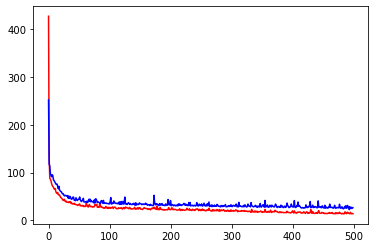

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], c = 'r')
plt.plot(history.history['val_loss'], c = 'b')
plt.show()

- 회귀의 경우, 마지막 Dense에서의 activation은 sigmoid가 아닌 linear를 사용한다.
    - linear는 $w_1z_1 + w_2z_2 + ... + w_nz_n$의 식을 sigmoid를 사용하지 않고 직접 사용하는 것이다.

- 회귀의 문제일 경우 binary_crossentropy가 아닌 mean_squared_error loss를 사용한다.
- 또한, accuracy가 없기 때문에 (선형 회귀이므로 정확도를 나타낼 수 없다.) mse를 사용한다. -> linear

- 회귀의 문제일 경우, model.fit(x_train, y_train)을 넣어서 사용.